In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
# Concatecanate time stamps for sheet 1 and 3
df_fasting = pd.read_excel('CGM & CBG.xlsx', sheet_name=0)
df_ogtt = pd.read_excel('CGM & CBG.xlsx', sheet_name=2)

# Standardize participant IDs by removing spaces
df_fasting['PARTICIPANTS ID'] = df_fasting.iloc[:, 0].astype(str).str.replace(" ", "", regex=True)
df_ogtt['PARTICIPANTS ID'] = df_ogtt.iloc[:, 0].astype(str).str.replace(" ", "", regex=True)

print('df_fasting: \n')
# print(df_fasting.head())

print('df_ogtt: \n')
# print(df_ogtt.head())

# Check to see if participants entry is same
log_filter = df_fasting['PARTICIPANTS ID'] == df_ogtt['PARTICIPANTS ID']

if sum(log_filter) == df_fasting.shape[0]:
    print("Participants are arranged in same order.")


df_fasting: 

df_ogtt: 

Participants are arranged in same order.


In [78]:
# Combine all data
df_CBG = pd.concat([df_fasting.iloc[:, [0, 9]], df_ogtt.iloc[:, 1::2]], axis=1)
df_CBG.columns = ['ID', 'Fasting', '15', '30', '60', '90', '120', '150', '180']

# Apply to only the glucose columns (exclude 'ID')
df_CBG.iloc[:, 1:] = df_CBG.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
print(df_CBG.head())

df_CGM = pd.concat([df_fasting.iloc[:, [0, 10]], df_ogtt.iloc[:, 2::2]], axis=1)
df_CGM.columns = ['ID', 'Fasting', '15', '30', '60', '90', '120', '150', '180']

# Apply to only the glucose columns (exclude 'ID')
df_CGM.iloc[:, 1:] = df_CGM.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
print(df_CGM.head())

         ID  Fasting     15     30     60     90    120    150    180
0   NMES011     88.5   66.0  105.0  126.0    NaN  143.0  109.0   85.0
1   NMES012     91.5  129.0  207.0  247.0  292.0  305.0  215.0   99.0
2  NMES012P     92.0  140.0  217.0  237.0  253.0  205.0  139.0    NaN
3   NMES013     85.5  293.0  281.0  293.0  185.0   93.0   70.0    NaN
4   NMES014    110.5  151.0  204.0  214.0  211.0  187.0  163.0  100.0
         ID Fasting     15     30     60     90    120    150    180
0   NMES011    77.0  120.0  146.5  182.5  175.5  169.5  134.5  108.0
1   NMES012   104.0  167.0  189.5  251.0  298.5  286.3  200.0   89.5
2  NMES012P    98.0  190.5  232.5  262.0  242.5  206.5  109.5    NaN
3   NMES013   236.0  112.5  140.5  165.0  131.5  147.0  120.0    NaN
4   NMES014   127.0  155.0  182.5  207.0  210.0  176.0  129.0   71.0


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_glucose_comparison(df_CBG, *cgm_datasets, labels=None, title="Mean CBG vs CGM with Standard Error"):
    """
    Plots mean ± SEM for CBG and one or more CGM datasets.

    Parameters:
        df_CBG (pd.DataFrame): Ground truth glucose data (must include time columns)
        *cgm_datasets: One or more CGM DataFrames to compare
        labels (list of str): Optional labels for CGM datasets
        title (str): Plot title
    """
    # Define time columns (exclude 'ID')
    time_cols = ['Fasting', '15', '30', '60', '90', '120', '150', '180']

    # Prepare CBG data
    cbg_mean = cbg_time.mean(axis=0)
    cbg_sem = cbg_time.sem(axis=0)

    # X-axis setup
    x_ticks = list(range(len(time_cols)))
    x_labels = time_cols

    # Plot
    plt.figure(figsize=(10, 6))
    plt.errorbar(x_ticks, cbg_mean, yerr=cbg_sem, fmt='-o', capsize=5, label='CBG (Ground Truth)')

    # Plot each CGM dataset
    for i, df_CGM in enumerate(cgm_datasets):
        cgm_mean = cgm_time.mean(axis=0)
        cgm_sem = cgm_time.sem(axis=0)

        label = labels[i] if labels and i < len(labels) else f'CGM {i+1}'
        plt.errorbar(x_ticks, cgm_mean, yerr=cgm_sem, fmt='-s', capsize=5, label=label)

    # Final formatting
    plt.xticks(x_ticks, x_labels)
    plt.xlabel("Time (min)")
    plt.ylabel("Glucose Level")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


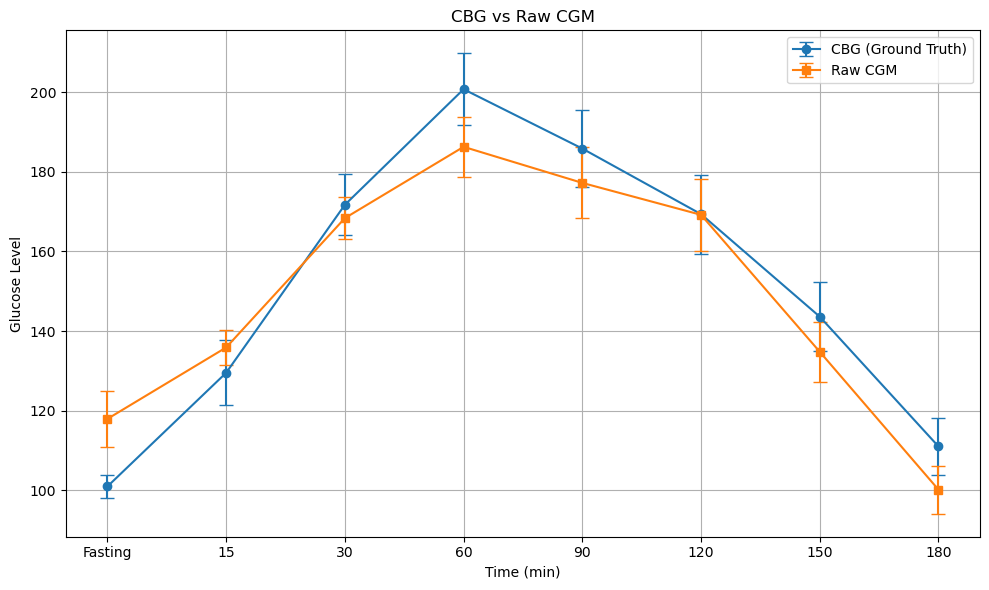

In [81]:
plot_glucose_comparison(
    df_CBG,
    df_CGM,
    labels=["Raw CGM"],
    title="CBG vs Raw CGM"
)

In [82]:
# Plotting all 40 participants side-by-side for CBG and CGM
import matplotlib.pyplot as plt

def plot_all_participants(df_CBG, df_CGM, time_cols=['Fasting', '15', '30', '60', '90', '120', '150', '180']):
    time_numeric = range(len(time_cols))
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    
    # CBG subplot
    axes[0].set_title("CBG (Ground Truth)")
    for i in range(df_CBG.shape[0]):  # 40 participants
        axes[0].plot(time_numeric, df_CBG.loc[i, time_cols], alpha=0.5)
    axes[0].set_xticks(time_numeric)
    axes[0].set_xticklabels(time_cols)
    axes[0].set_xlabel("Time (min)")
    axes[0].set_ylabel("Glucose Level")
    
    # CGM subplot
    axes[1].set_title("CGM (Sensor)")
    for i in range(df_CGM.shape[0]):
        axes[1].plot(time_numeric, df_CGM.loc[i, time_cols], alpha=0.5)
    axes[1].set_xticks(time_numeric)
    axes[1].set_xticklabels(time_cols)
    axes[1].set_xlabel("Time (min)")

    plt.tight_layout()
    plt.show()

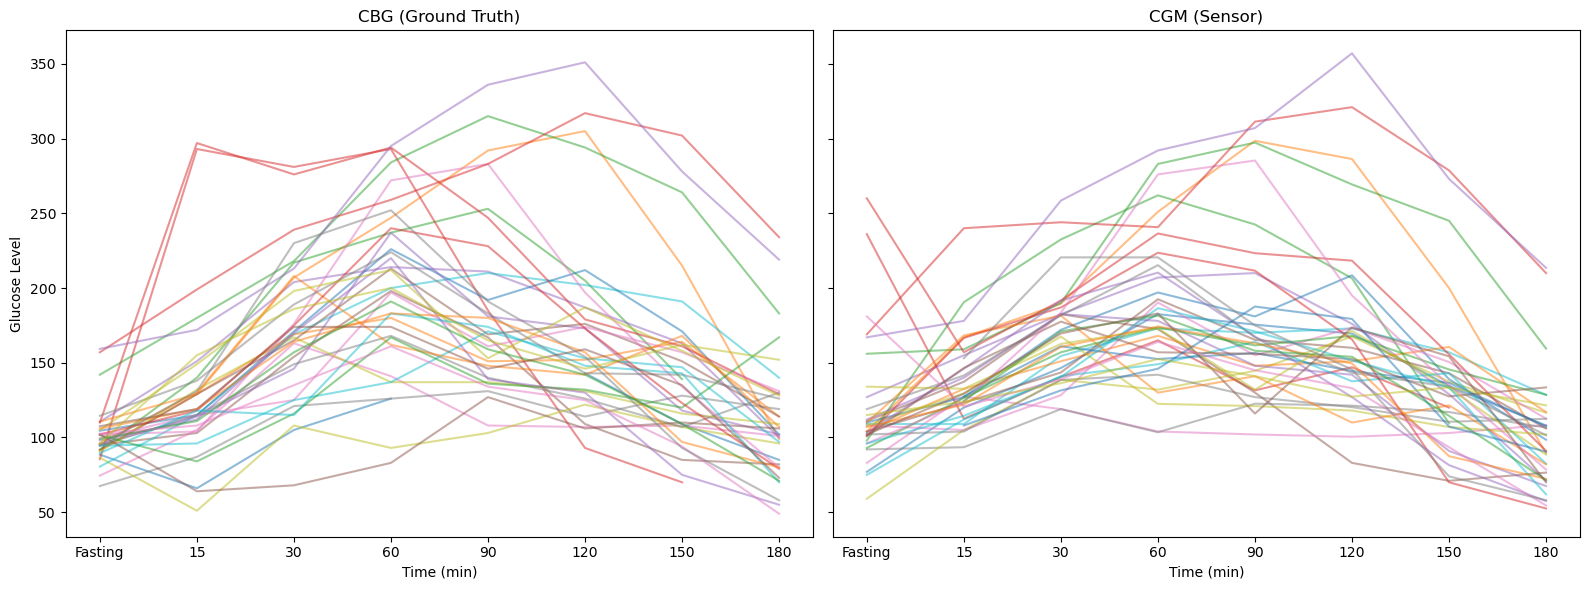

In [83]:
plot_all_participants(df_CBG, df_CGM)

In [84]:
import matplotlib.pyplot as plt

def plot_all_participants_overlay(df_CBG, df_CGM, time_cols=['Fasting', '15', '30', '60', '90', '120', '150', '180']):
    num_participants = df_CBG.shape[0]
    time_numeric = range(len(time_cols))
    
    cols = 8
    rows = int(np.ceil(num_participants / cols))
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10), sharex=True, sharey=True)
    axes = axes.flatten()
    
    for i in range(num_participants):
        ax = axes[i]
        cbg = df_CBG.loc[i, time_cols].astype(float)
        cgm = df_CGM.loc[i, time_cols].astype(float)
        
        ax.plot(time_numeric, cbg, '-o', label='CBG', color='blue')
        ax.plot(time_numeric, cgm, '-s', label='CGM', color='orange')
        ax.set_title(f'ID {df_CBG.iloc[i, 0]}', fontsize=8)
        ax.set_xticks(time_numeric)
        ax.set_xticklabels(time_cols, rotation=45, fontsize=6)
        ax.tick_params(labelsize=6)
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    # Global legend and labels
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2)
    fig.suptitle("CBG vs CGM for All Participants", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

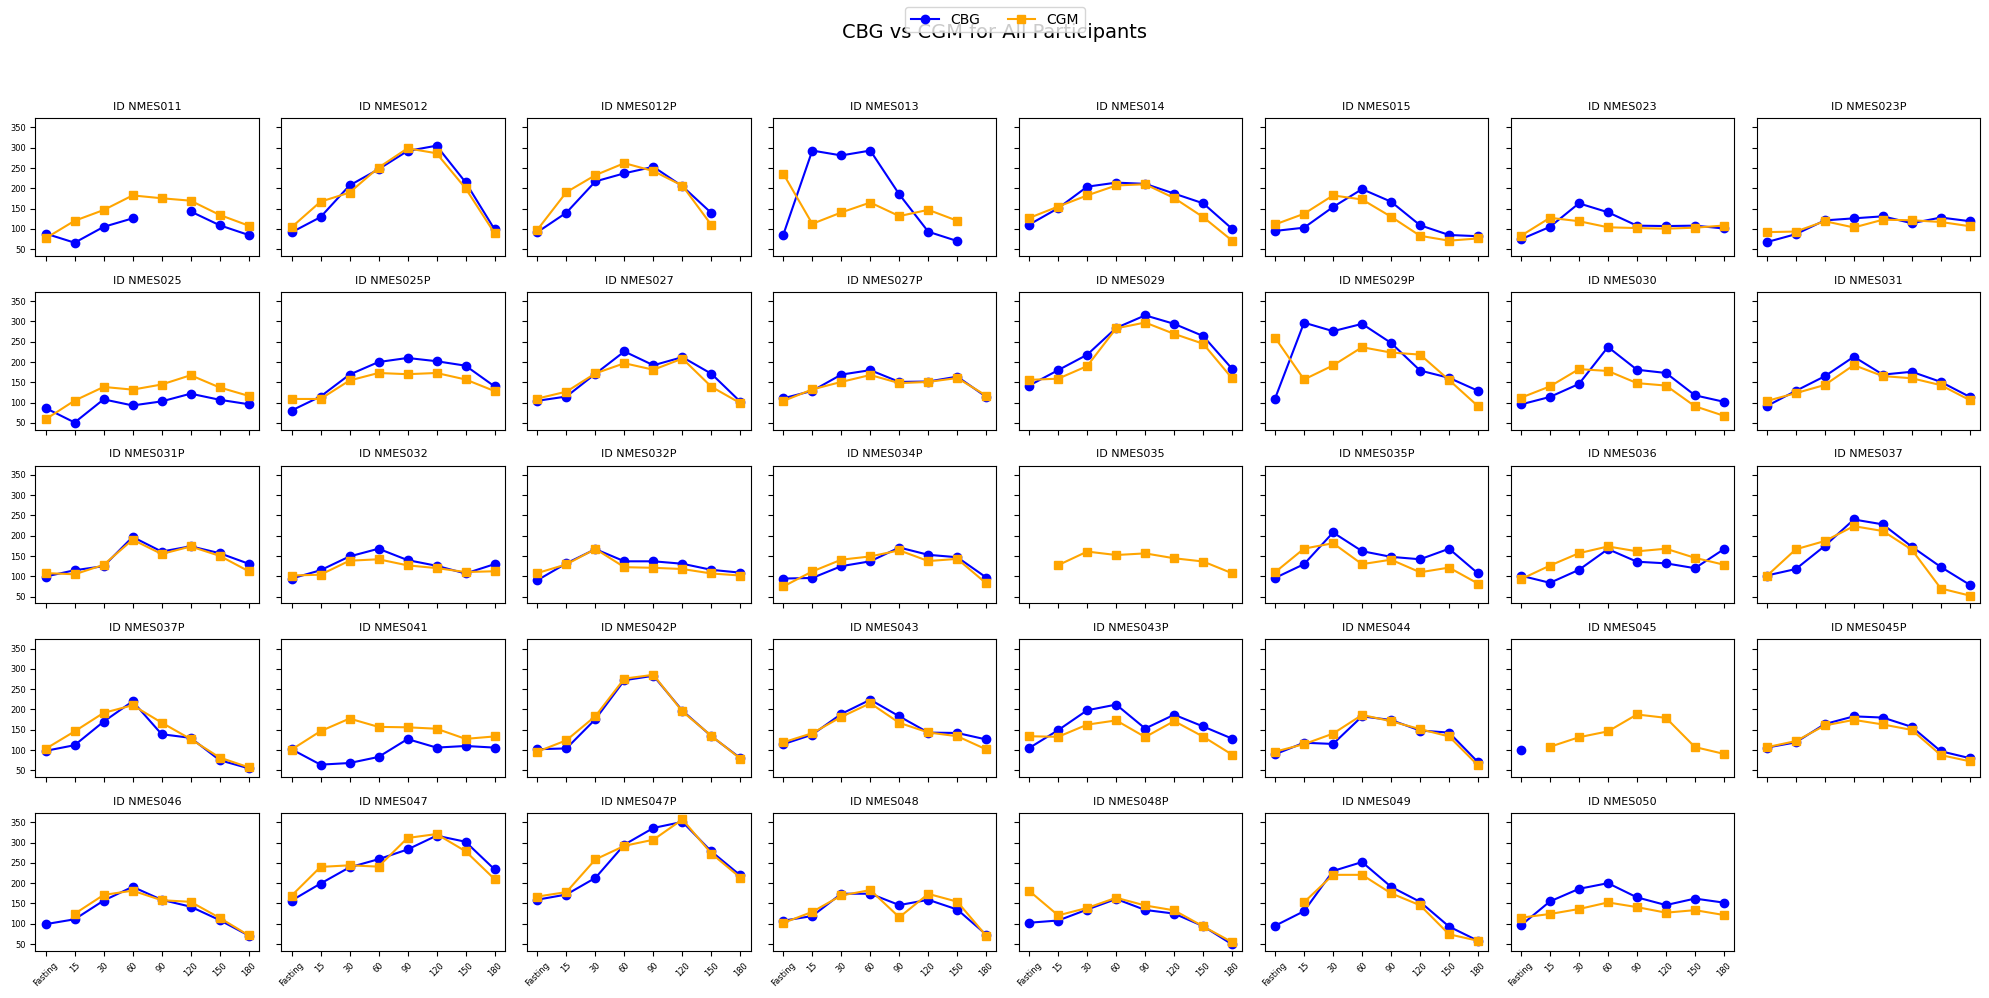

In [85]:
plot_all_participants_overlay(df_CBG, df_CGM)